# Notebook de Stage - musiSorbonne

## Importation des données

In [1]:
import pandas as pd

data = pd.read_csv("./emails2003.csv")

data.iloc[0]

From              "Nicolas Meeus" <nicolas.meeus@paris4.sorbonne...
To                           "musiSorbonne" <musiSorbonne@cines.fr>
Subject                                        Tr: annonce colloque
Date                                 Mon, 1 Dec 2003 18:32:48 +0100
Body              annonce colloque\nMousikè et Aretè \nLa Musiqu...
ConversationID                                1837578121379584768.0
Name: 0, dtype: object

Chaque ligne représente un mail, ayant pour features l'expéditeur "From", le destinataire "To" (musiSorbonne), l'objet du mail "Subject", la data "Date", ainsi que le corps du message "Body".

En utilisant des fonctions dans la suite du Notebook, on a décelé des valeurs non conformes.

In [2]:
#Valeur non conforme
data.iloc[1195,3], data.iloc[132,3], data.iloc[192,3]

('05 Feb 2003 11:20:16 +0000',
 'Sun, 23 Nov 03 23:19:18',
 'Thu, 16 Oct 03 16:46:43')

In [3]:
data.iloc[1195,3] = "Wed, " + data.iloc[1195,3]
data.iloc[132,3] = 'Sun, 23 Nov 2003 23:19:18 +0100'
data.iloc[192,3] = 'Thu, 16 Oct 2003 16:46:43 +0100'

## Classifier par discussion

In [4]:
import numpy as np

import math

from unidecode import unidecode

#Création d'une liste de couple Sujet-Index
list_subject = np.stack((np.array(data["Subject"]),np.arange(len(data)))).T

#Fonction qui range chaque message par discussion
def organize_forum(forum):
    res = []
    doubt1 = []
    doubt2 = []
    
    for i in range(len(forum)):
        message, pos = forum[i]
        
        #On enlève cette mention, car elle peut être là ou non indépendamment de quelconque lien avec un autre message
        message = message.replace("[musiSorbonne] ", "")
        
        #Si c'est une réponse, elle commence donc par re et on cherche la discussion d'origine, avec une grande tolérance
        if message[:3].lower() == "re:" or message[:4].lower() == "re :":
            l = 0
            back = 18
        
        #Sinon, c'est probablement un nouveau sujet, mais au cherche quand même dans les 5 derniers messages avec une faible tolerance pour être sûr
        else:
            l = 4
            back = 5
            
        #On enlève les parties inutile de l'objet du mail
        while True:
            if message == "":
                doubt1.append(pos)
                break
            elif message[:2].lower() == "re":
                message = message[2:]
            elif message[0] == " ":
                message = message[1:]
            elif message[0] == ":":
                message = message[1:]
            elif message[:2].lower() == "tr":
                message = message[2:]
            else:
                message = message.strip()
                break
                
        find = False
            
        
        #On cherche le mail en augmantant la tolérance petit à petit
        while l <= 4 and not find:
            
            #On cherche dans les back derniers messages
            for j in range(i-1, max(-1, i-back), -1):
                
                #On s'arrête si on a trouvé
                if find:
                    break
                
                #On regarde si ça correspond sans les accents, puis en remplaçant les caractères spéciaux par X
                if (unidecode(message) in unidecode(forum[j,0])) or (unidecode(message) in ''.join(c if c == unidecode(c) else 'X' for c in forum[j,0])):
                    
                    #On cherche à quelle discussion est associé le message qui correspond
                    for k in range(len(res)):
                        
                        #On s'arrête si on a trouvé
                        if find:
                            break
                        
                        #Si on a trouvé la discussion, on y ajoute le message dont on cherche la discussion
                        elif j in res[k]:
                            res[k].append(pos)
                            find = True
                            break
            
            #On réduit le message pour augmenter la tolérance si on n'a pas trouvé
            if not find:
                message = message[:min(max(3,math.floor(len(message)/2)), len(message))]
                l += 1
        
        #Si on n'a pas trouvé de discussion correspondante, on le déclare comme étant un nouveau sujet
        if not find:
            res.append([pos])
            doubt2.append(pos)

    return res

#Liste de discussions
forum = organize_forum(list_subject)

#Liste de nombre correspondant à la longueur de chaque discussion
len_forum = [len(thread) for thread in forum]

#Liste de nombre correspondant à la longueur de chaque discussion si la discussion compte plus de deux messages
len_forum_2 = [len(thread) for thread in forum if len(thread) > 1]

forum

[[0, 3, 4],
 [1],
 [2],
 [5],
 [6],
 [7],
 [8],
 [9],
 [10],
 [11],
 [12, 13, 14, 17, 20],
 [15],
 [16],
 [18, 26],
 [19],
 [21],
 [22],
 [23],
 [24],
 [25],
 [27],
 [28],
 [29],
 [30, 31, 32, 33],
 [34, 36],
 [35],
 [37],
 [38],
 [39, 41, 42, 43, 44, 45, 46],
 [40],
 [47],
 [48, 49],
 [50],
 [51],
 [52, 53, 54, 55],
 [56],
 [57],
 [58],
 [59],
 [60],
 [61, 63, 64, 67, 70, 73],
 [62, 65, 66, 71, 72],
 [68],
 [69],
 [74, 81, 85],
 [75],
 [76, 79, 80],
 [77],
 [78],
 [82, 83, 84, 86],
 [87, 88],
 [89],
 [90],
 [91],
 [92],
 [93],
 [94],
 [95],
 [96, 98],
 [97],
 [99],
 [100],
 [101, 102, 104, 105, 106, 107, 111, 113, 115],
 [103, 112, 114, 116, 127],
 [108],
 [109],
 [110],
 [117],
 [118],
 [119, 120],
 [121, 124],
 [122],
 [123],
 [125],
 [126],
 [128],
 [129],
 [130],
 [131, 135],
 [132],
 [133],
 [134],
 [136, 137, 138, 139, 140, 141, 142, 143, 144, 145],
 [146],
 [147],
 [148, 149],
 [150],
 [151],
 [152],
 [153],
 [154, 161, 162, 165, 166],
 [155, 156, 157, 158, 159],
 [160, 163],
 

## Identifier chaque utilisateur avec un nom unique

In [5]:
#Prendre seulement le nom
def only_name(txt):
    #On onlève les guillemets et on remplace les tirets et points par des espaces
    res = txt.replace('"','')
    res = res.replace('-',' ')
    res = res.replace('.',' ')
    
    #Si on trouve un < qui n'est pas en première position, c'est sans doute pour préciser le mail, qu'on va retirer
    if ('<' in res) and res[0] != "<":
        res = res[:res.rfind("<") - 1]
    
    res = res.replace('<','')
    res = res.strip()
    
    #On enlève le nom de domaine associé au mail si c'en est un
    if '@' in res:
        res = res[:res.find('@')]
    
    #On retourne le mail en minuscule et sans caractères spéciaux
    return unidecode(res).lower()

#On rajoute une colonne identifiant l'expéditeur de façon unique
data['Names'] = data["From"].apply(only_name)

## Statistiques descriptives

In [6]:
#Taille de l'échantillon, nombre de messages
len(data)

1486

In [7]:
#Nombre d'utilisateurs
len(np.unique(data['Names']))

150

In [8]:
#Nombre de discussions
len(forum)

625

In [9]:
#Nombre de discussions ayant plus de 2 messages
len(len_forum_2)

248

In [10]:
#Nombre moyen de messages par discussion
np.mean(len_forum)

2.3776

In [11]:
#Nombre moyen de messages par discussion qui compte strictement plus d'un message
np.mean(len_forum_2)

4.471774193548387

In [12]:
from nltk.tokenize import word_tokenize

#Fonction qui approxime le nombre de mot
def word_count(txt):
    #On enlève les caractères spéciaux
    msg = unidecode(txt)
    
    #On enlève le texte précedant cette réponse s'il y en a un
    while 'original message' in msg:
        msg = msg[:msg.find('original message')]
        
    #Tokenization
    tokens = word_tokenize(msg)
    
    #Filtrer les caractères spéciaux
    word_list = [token for token in tokens if (ord('a') <= ord(token[0]) <= ord('z')) or (ord('A') <= ord(token[0]) <= ord('Z'))]
    
    #On retourne le nombre de mot
    return len(word_list)

#On rajoute une colonne précisant le nombre de mots du message
data["Word Count"] = data["Body"].apply(word_count)

In [13]:
#Le nombre moyen de mot par message
np.mean(data["Word Count"])

351.7368775235532

In [14]:
#Indices des premiers messages d'une discussion
subject_message = [thread[0] for thread in forum]

#Indices des réponses d'une discussion
answer_message = [i for i in range(1486) if not i in subject_message]

In [15]:
#Le nombre moyen de mot par premiers messages d'une discussion
np.mean(data["Word Count"][subject_message])

377.0736

In [16]:
#Le nombre moyen de mot par réponses d'une discussion
np.mean(data["Word Count"][answer_message])

333.3449477351916

## Analyse de la participation - Activité

['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']


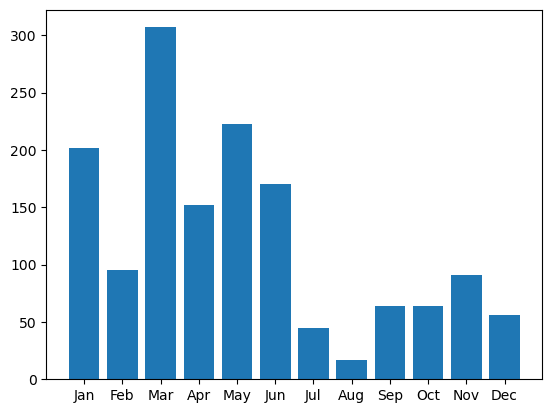

In [17]:
import matplotlib.pyplot as plt

#Ne prendre que la partie correspondante au mois
def extract_month(txt):
    if txt[6] == ' ':
        return txt[7:10]
    if txt[7] == ' ':
        return txt[8:11]
    
month_list = np.vectorize(extract_month)(data["Date"])

#Comptage de chaque occurence
month, nbr = np.unique(month_list, return_counts = True)

#On explicite l'ordre étant donné que ce n'est pas dans l'ordre
order = [4, 3, 7, 0, 8, 6, 5, 1, 11, 10, 9, 2]

#Vérification de l'ordre
print(month[order])

month, nbr = month[order], nbr[order]

plt.bar(month, nbr)
plt.savefig("month_participation.png")

['Mon' 'Tue' 'Wed' 'Thu' 'Fri' 'Sat' 'Sun']


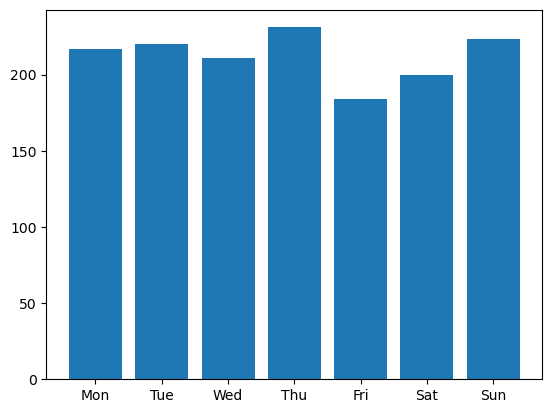

In [18]:
#Ne prendre que la partie correspondante au jour de la semaine
extract_week = lambda x: x[0:3]
    
week_list = np.vectorize(extract_week)(data["Date"])

#Comptage de chaque occurence
week, nbr = np.unique(week_list, return_counts = True)

#On explicite l'ordre étant donné que ce n'est pas dans l'ordre
order = [1, 5, 6, 4, 0, 2, 3]

#Vérification de l'ordre
print(week[order])

week, nbr = week[order], nbr[order]

plt.bar(week, nbr)
plt.savefig("day_participation.png")

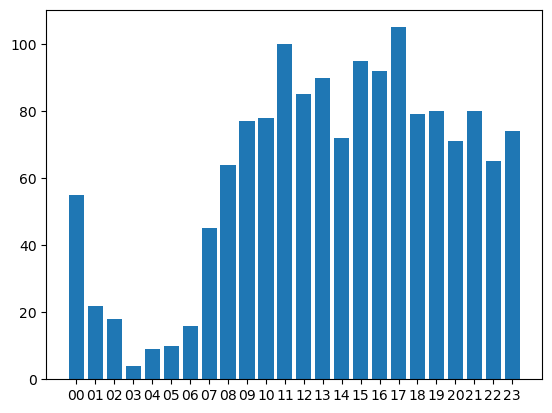

In [19]:
#Ne prendre que la partie correspondante à l'heure
def extract_hour(txt):
    if txt[6] == ' ':
        return txt[16:18]
    if txt[7] == ' ':
        return txt[17:19]
    
hour_list = np.vectorize(extract_hour)(data["Date"])

#Comptage de chaque occurence
hour, nbr = np.unique(hour_list, return_counts = True)

plt.bar(hour, nbr)
plt.savefig("hour_participation.png")

## Analyse de la participation - Utilisateurs

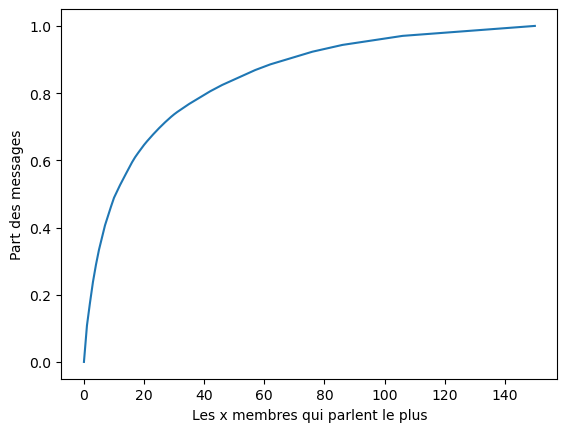

In [20]:
#Le nombre de message associé à chaque membre
user, nbr = np.unique(data['Names'], return_counts = True)

#Par ordre décroissant
order = np.flip(np.argsort(nbr))

#Graphique du pourcentage de message posté par les x membres qui parlent le plus
x = [0]
y = [0]

for i in range(len(user)):
    x.append(i + 1)
    y.append(y[-1] + nbr[order[i]])

y = y/np.max(y)

plt.plot(x,y)
plt.xlabel('Les x membres qui parlent le plus')
plt.ylabel('Part des messages')
plt.savefig("top_members_participation.png")

In [21]:
for i in range(1, 12):
    print(f"Les {i} membres qui parlent le plus ont posté {y[i] * 100:.1f}% des messages")

Les 1 membres qui parlent le plus ont posté 10.8% des messages
Les 2 membres qui parlent le plus ont posté 17.6% des messages
Les 3 membres qui parlent le plus ont posté 23.8% des messages
Les 4 membres qui parlent le plus ont posté 28.9% des messages
Les 5 membres qui parlent le plus ont posté 33.4% des messages
Les 6 membres qui parlent le plus ont posté 37.1% des messages
Les 7 membres qui parlent le plus ont posté 40.6% des messages
Les 8 membres qui parlent le plus ont posté 43.5% des messages
Les 9 membres qui parlent le plus ont posté 46.2% des messages
Les 10 membres qui parlent le plus ont posté 48.9% des messages
Les 11 membres qui parlent le plus ont posté 50.7% des messages


## Analyse de sentiments

In [22]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

#Fonction d'analyse de sentiment d'un texte
def sentiment_analyse(txt):
    
    #Preprocessing
    #On met le texte en minuscule
    msg = txt.lower()
    
    #On enlève le texte précedant cette réponse s'il y en a un
    while 'original message' in msg:
        msg = msg[:msg.find('original message')]
    
    #Tokenization
    tokens = word_tokenize(msg)
    
    #Filtrer les stop words
    filtered_tokens = [token for token in tokens if token not in stopwords.words('french')]
    
    #Lemmatization
    lemmatized_tokens = [WordNetLemmatizer().lemmatize(token) for token in filtered_tokens]
    
    #On joint le texte
    processed_text = ' '.join(lemmatized_tokens)
    
    #On analyse le texte résultant
    res = SentimentIntensityAnalyzer().polarity_scores(processed_text)
    
    #On renvoie la composé qui correspond au bilan, négatif si négatif, positif si positif
    return res['compound']

#On rajoute une colonne Sentiment
data["Sentiment"] = data['Body'].apply(sentiment_analyse)

In [23]:
#Le bilan sentimental final de cette année du forum
np.sum(data['Sentiment'])

14.074300000000001

In [24]:
#La moyenne de sentiment de cette année
np.mean(data['Sentiment'])

0.009471265141318977

In [25]:
#Le nombre de messages positifs
np.count_nonzero(data['Sentiment'] > 0)

462

In [26]:
#Le nombre de messages neutres
np.count_nonzero(data['Sentiment'] == 0)

544

In [27]:
#Le nombre de messages négatifs
np.count_nonzero(data['Sentiment'] < 0)

480

In [28]:
#Le message le plus positif
print(data.iloc[np.argmax(data['Sentiment'])]["Subject"])
np.max(data['Sentiment'])

Annonce


0.9996

In [29]:
#Le message le plus négatif
data.iloc[np.argmin(data['Sentiment'])]["Subject"]
np.min(data['Sentiment'])

-0.999

In [30]:
#Calcul du bilan sentimental de chaque discussion:
thread_sentiment = []
for thread in forum:
    thread_sentiment.append(np.sum(data["Sentiment"][thread]))

In [31]:
#Les 3 discussions les plus positives:

#Ordre décroissante de bilan sentimental
order = np.flip(np.argsort(thread_sentiment))

#Affichage de chaque sujet ainsi que son bilan sentimental associé
for i in order[:3]:
    print(data["Subject"][forum[i][0]] + "  |  " + str(thread_sentiment[i]))

Beethoven dans la musique contemporaine  |  4.9987
Re: [musiSorbonne] Théorie de la forme au XVIIe siècle  |  3.0309999999999997
De la Grandeur des Compositeurs  |  2.8695000000000004


In [32]:
#Les 3 discussions les plus négatives:

#Ordre décroissante de bilan sentimental
order = np.argsort(thread_sentiment)

#Affichage de chaque sujet ainsi que son bilan sentimental associé
for i in order[:3]:
    print(data["Subject"][forum[i][0]] + "  |  " + str(thread_sentiment[i]))

Re: [musiSorbonne] tension musicale  |  -7.1895
Analyse mawwâl  |  -6.646199999999999
Terme tab'  |  -4.016


In [33]:
#Calcul du mouvement sentimental et du mouvement sentimental moyen de chaque discussion
thread_sentiment_mouvement = []
thread_sentiment_mouvement_mean = []

for thread in forum:
    
    #Array des sentiments des messages de la discussion
    sen = np.array(data["Sentiment"][thread])
    
    #Calcul en utilisant le slicing d'array
    if len(sen) > 1:
        thread_sentiment_mouvement.append(np.sum(np.abs(sen[1:] - sen[:-1])))
        thread_sentiment_mouvement_mean.append(np.sum(np.abs(sen[1:] - sen[:-1]))/len(sen))
    else:
        thread_sentiment_mouvement.append(0)
        thread_sentiment_mouvement_mean.append(0)

In [34]:
#Les 3 discussions les plus mouvementées sentimentalement:
order = np.flip(np.argsort(thread_sentiment_mouvement))
for i in order[:3]:
    print(data["Subject"][forum[i][0]] + "  |  " + str(thread_sentiment_mouvement_mean[i]) + "  |  " + str(len(data.iloc[forum[i]])))

modes formulaires et modes scalaires  |  0.7702000000000001  |  20
a la decouverte de la musique jj rapin  |  0.8544071428571429  |  14
Indignation  |  0.4108827586206897  |  29


In [35]:
#Les 3 discussions les plus mouvementées sentimentalement en moyenne:
order = np.flip(np.argsort(thread_sentiment_mouvement_mean))
for i in order[:3]:
    print(data["Subject"][forum[i][0]] + "  |  " + str(thread_sentiment_mouvement_mean[i]) + "  |  " + str(len(data.iloc[forum[i]])))

josquin!  |  1.226325  |  4
[musiSorbonne] Cent et Savart  |  0.9878750000000001  |  4
discussion sur les modes  |  0.8944833333333332  |  6


In [36]:
#Calcul de l'impact sentimental par utilisateur
sentiment_per_user = []

for name in np.unique(data['Names']):
    data_name = data[data['Names'] == name]
    
    balance = np.sum(data_name["Sentiment"])
    mean = np.mean(data_name["Sentiment"])
    
    sentiment_per_user.append(np.array([name, balance, mean, len(data_name)], dtype = object))
        
sentiment_per_user = np.array(sentiment_per_user)

## Analyse des communautés d'utilisateurs

In [37]:
import networkx as nx

#Liste des participants par discussion
user_bags = []

for d in forum:
    #L'ensemble des utilisateurs de la discussion
    bag = set(data["Names"][d])
    
    user_bags.append(bag)

#Liste des utilisateurs
list_user = np.unique(data["Names"])

#Initialisation du graphe
G = nx.Graph()

AnB = 0

#Création du graphe pondéré de discussions en commun entre deux utilisateurs

#Pour chaque couple d'utilisateur qu'on n'a pas déjà regardé
for i in range(len(list_user)):
    for j in range(i, len(list_user)):
        
        #On regarde dans chaque sacs si les deux utilisateurs sont présents
        for bag in user_bags:
            if (list_user[i] in bag) and (list_user[j] in bag) and i != j:
                AnB += 1
        
        #S'il y a des discussions en commun, on ajoute une arrête pondérée par le nombre de discussions en commun
        if AnB > 0:
            G.add_edge(list_user[i], list_user[j], weight = AnB, color = "grey")
        
        AnB = 0
    
#Calcul des communautés par Louvain
communities = nx.community.louvain_communities(G, seed = 1000)

print("Modularity = " + str(nx.community.modularity(G, communities)))

#Création des utilisateurs manquants
for i in range(len(list_user)):
    G.add_node(list_user[i])

#Affectation des utilisateurs seuls à une communauté
found = {u for community in communities for u in community}
alone = {u for u in list_user if not u in found}
communities.append(alone)

#Attribution des groupes et tailles à chaque noeud
for i in range(len(communities)):
    for user in communities[i]:
        G.nodes[user]['group'] = i
        G.nodes[user]['size'] = np.sqrt(len(data[data["Names"] == user])) * 2

#Anonymisation
labeler = {list_user[i]:i for i in range(len(list_user))}
G = nx.relabel_nodes(G, labeler)

Modularity = 0.21677843570545294


In [38]:
from pyvis.network import Network

#Affichage du graph
nt = Network('1080px', '1920px')
nt.from_nx(G)
nt.show_buttons()
nt.repulsion()
nt.show('nx.html', notebook=False)

nx.html


In [39]:
#Calcul d'un score de communauté pour chaque discussion
community_score = np.zeros((len(forum), 6))

#Pour chaque discussion du forum
for i in range(len(forum)):
    
    #On compte le nombre d'utilisateur de chaque communauté au sein de cette discussion
    for j in forum[i]:
        for k in range(len(communities)):
            if data["Names"][j] in communities[k]:
                community_score[i,k] += 1
    
    #On divise par le nombre d'utilisateurs afi d'avoir le pourcentage
    community_score[i] /= np.sum(community_score[i])
    
    #On multiplie par la racine du nmobre de messages pour qu'elle influe mais pas trop
    community_score[i] *= np.sqrt(len(forum[i]))

In [40]:
#Communauté C à regarder
C = 0

order = np.flip(np.argsort(community_score[:,C]))

#Discussions type de la communauté C
for i in range(5):
    print(str(community_score[order[i],C]) + "  |  " + data["Subject"][forum[order[i]][0]])

#Les bilans sentimentaux des 10 discussions les plus relevants de la commmunauté C
order = np.flip(np.argsort(community_score[:,C]))

np.array(thread_sentiment)[order[:10]]

4.564354645876384  |  la musique tonale contemporaine
3.872983346207417  |  Question sur  notre Victoire de la musique 2003 (Thierry Escaich, composition) 
2.8284271247461903  |  valeur
2.82842712474619  |  le disque de musique classique
2.1380899352993947  |  a la decouverte de la musique jj rapin


array([-2.3547, -0.1751, -1.6779,  1.2192,  1.4089,  2.0436, -0.5204,
       -0.9361, -0.7655, -2.0667])

In [41]:
#Communauté C à regarder
C = 1

order = np.flip(np.argsort(community_score[:,C]))

#Discussions type de la communauté C
for i in range(5):
    print(str(community_score[order[i],C]) + "  |  " + data["Subject"][forum[order[i]][0]])

#Les bilans sentimentaux des 10 discussions les plus relevants de la commmunauté C
order = np.flip(np.argsort(community_score[:,C]))

np.array(thread_sentiment)[order[:10]]

2.23606797749979  |  Histoires de la musique
2.121320343559643  |  Re: [musiSorbonne] Chine et monde musulman
2.041241452319315  |  discussion sur les modes
1.788854381999832  |  terminologie: texture
1.7320508075688772  |  QUESTION : MODALITE ET TONALITE : QUELLES DATES ?!


array([-0.772 , -2.4871, -1.2876,  0.2263, -1.5098,  2.8695,  0.6293,
       -1.7845, -7.1895,  0.0776])

In [42]:
#Communauté C à regarder
C = 2

order = np.flip(np.argsort(community_score[:,C]))

#Discussions type de la communauté C
for i in range(5):
    print(str(community_score[order[i],C]) + "  |  " + data["Subject"][forum[order[i]][0]])

#Les bilans sentimentaux des 10 discussions les plus relevants de la commmunauté C
order = np.flip(np.argsort(community_score[:,C]))

np.array(thread_sentiment)[order[:10]]

4.456688116249245  |  Indignation
2.529822128134704  |  Intervalles al-Khawârismî
2.449489742783178  |  Il est temps de réserver
2.2135943621178655  |  Re: [musiSorbonne] Intonations
2.012461179749811  |  modes formulaires et modes scalaires


array([-0.3693,  0.4629,  0.7324, -0.1905, -2.5813,  1.1277,  1.0621,
       -1.1465,  0.0313, -1.4869])

In [43]:
#Communauté C à regarder
C = 3

order = np.flip(np.argsort(community_score[:,C]))

#Discussions type de la communauté C
for i in range(5):
    print(str(community_score[order[i],C]) + "  |  " + data["Subject"][forum[order[i]][0]])

#Les bilans sentimentaux des 10 discussions les plus relevants de la commmunauté C
order = np.flip(np.argsort(community_score[:,C]))

np.array(thread_sentiment)[order[:10]]

3.605551275463989  |  Analyse mawwâl
2.8460498941515415  |  Josquin
2.8284271247461903  |  [musiSorbonne] Lecture MP3
2.6666666666666665  |  Re: [musiSorbonne] mXlodie
2.449489742783178  |  Barthes théoricien de la musique


array([-6.6462,  0.6714, -0.6703,  0.1954,  0.6883,  1.1121,  2.1629,
        0.4035, -0.0722,  1.9352])

In [44]:
#Communauté C à regarder
C = 4

order = np.flip(np.argsort(community_score[:,C]))

#Discussions type de la communauté C
for i in range(5):
    print(str(community_score[order[i],C]) + "  |  " + data["Subject"][forum[order[i]][0]])

#Les bilans sentimentaux des 10 discussions les plus relevants de la commmunauté C
order = np.flip(np.argsort(community_score[:,C]))

np.array(thread_sentiment)[order[:10]]

2.910427500435996  |  Beethoven dans la musique contemporaine
2.2677868380553634  |  Question
2.23606797749979  |  Debussy, Golliwog
2.041241452319315  |  Qui conna
1.7320508075688772  |  Leon theremine


array([ 4.9987, -1.4877,  0.7184, -0.1733,  0.    , -0.045 ,  0.1401,
       -1.815 , -1.4088, -2.8381])

In [45]:
#Communauté C à regarder
C = 5

order = np.flip(np.argsort(community_score[:,C]))

#Discussions type de la communauté C
for i in range(5):
    print(str(community_score[order[i],C]) + "  |  " + data["Subject"][forum[order[i]][0]])

#Les bilans sentimentaux des 10 discussions les plus relevants de la commmunauté C
order = np.flip(np.argsort(community_score[:,C]))

np.array(thread_sentiment)[order[:10]]

1.0  |  annonce colloque
1.0  |  parution
1.0  |  Rencontres Moyen-Age et Renaissance
1.0  |  Vient de paraître : Revue de Musicologie 88/2 (2002)
1.0  |  Vient de paraître : Revue de Musicologie 89/1 : 2003


array([-0.1027, -0.802 , -0.6072,  0.765 ,  0.7506,  0.9013,  0.    ,
        0.9788,  0.    ,  0.    ])

In [46]:
import spacy

#Trouver les mots-clefs
#On utilise des données françaises afin de trouver les entités nommées
nlp = spacy.load('fr_core_news_sm')

#Fonction qui détermine les mots-clefs d'un texte
def find_keyword(txt):
    
    res = txt
    
    #On enlève le message originel s'il est présent dans le corps du message
    while 'original message' in res.lower():
        res = res[:res.lower().find('original message')]
    
    #On détermine les entités nommées
    keywords = [str(word) for word in nlp(unidecode(res)).ents]
    
    #On le retourne sous forme d'array numpy
    return np.array(keywords, dtype = object)

#On ajoute une colonne Keyword
data["Keyword"] = data["Body"].apply(find_keyword)

In [47]:
#Les 20 mots clefs les plus trouvés
#Création d'une liste concatenant toutes les listes d'entitées nommées
all_keyword = np.array([])
for liste in data["Keyword"]:
    all_keyword = np.append(all_keyword, liste)

#On compte l'occurence de chaque entité nommmée
mots, nbr = np.unique(all_keyword, return_counts = True)

#Ordre décroissant d'occurence
order = np.flip(np.argsort(nbr))

for i in range(20):
    
    #Affichage de la i-ème entité nommée la plus obervée
    pos = order[i]
    
    #Anonymisation s'il s'agit d'un utilisateur
    if not i in [1, 7, 9, 10, 14, 15, 16]:
        print(str(mots[pos]) + "  |  " + str(nbr[pos]))

Paris  |  422
France  |  167
Bonjour  |  162
Merci  |  149
Beethoven  |  137
Bach  |  131
Europe  |  117
Paris IV  |  110
Mozart  |  107
Sorbonne  |  107
Cordialement  |  78
I  |  77
Berlioz  |  72
